In [1]:
from scipy.stats import norm

In [5]:
norm.cdf(0)

0.5

In [6]:
norm.cdf(0, loc=1)

0.15865525393145707

In [7]:
norm.cdf(0, loc=1, scale=0.02)

0.0

Have a production line with a certain value of mu, so that the probability of having less than 1L is 0.05

In [8]:
norm.cdf(1, loc=1, scale=0.02)

0.5

In [17]:
norm.cdf(1, loc=1.03, scale=0.02).round(2)

0.07

In [18]:
import numpy as np

In [30]:
x=np.linspace(1,1.1,1001)

In [31]:
norm.cdf(1, loc=x, scale=0.02)

array([5.00000000e-01, 4.98005297e-01, 4.96010644e-01, ...,
       3.01896463e-07, 2.94178837e-07, 2.86651572e-07])

In [32]:
import matplotlib.pyplot as plt

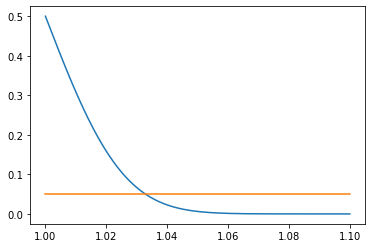

In [33]:
plt.plot(x, norm.cdf(1, loc=x, scale=0.02))
plt.plot(x, [0.05]*len(x))

In [35]:
def func(x):
    return norm.cdf(1, loc=x, scale=0.02)-0.05

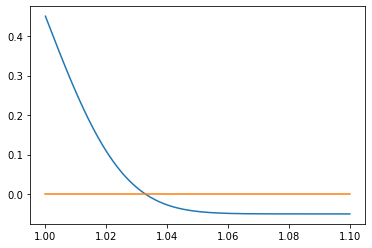

In [43]:
plt.plot(x, func(x))
plt.plot(x, [0]*len(x))

In [41]:
func(1.032)

0.0047992916995578325

In [44]:
from scipy.optimize import fsolve

In [45]:
fsolve(func, 1)

array([1.03289707])

In [46]:
func(1.03289707)

1.3093222950288919e-08

In [47]:
norm.cdf(1, loc=1.03289707, scale=0.02)

0.05000001309322295

In [49]:
x=np.linspace(1.03,1.035,1001)

In [53]:
for i in x:
    if abs(norm.cdf(1, loc=i, scale=0.02)-0.05)<0.0001:
        print(i)
        break

1.03288


In [54]:
from scipy.stats import binom

In [56]:
p=1-binom.pmf(k=0,n=10,p=0.05) #proba of paying fine right now without any changes

In [57]:
p*10000 #the expected value of fine

4012.630607616211

In [58]:
p1=1-binom.pmf(k=0,n=10,p=0.04) #proba of paying fine by changing the proba by 1%

In [59]:
p1*10000 +1000 #the expected value of fine

4351.6736400849895

In [60]:
p2=1-binom.pmf(k=0,n=10,p=0.03) #proba of paying fine by changing the proba by 2%
p2*10000 +2000 #the expected value of fine

4625.758731050717

In [61]:
p6=1-binom.pmf(k=0,n=10,p=0.0) #proba of paying fine by changing the proba by 2%
p6*10000 +5000 #the expected value of fine

5000.0

In [63]:
students=['Alan','Isra','Leo','Nico','Vina','Zena','Laetitia','Natalya','Edwin','Bruna','Daniel']

In [67]:
import random 

In [68]:
def random_combination(iterable, r):
    "Random selection from itertools.combinations(iterable, r)"
    pool = tuple(iterable)
    n = len(pool)
    indices = sorted(random.sample(range(n), r))
    return tuple(pool[i] for i in indices)

In [117]:
def random_groups(iterable, size):
    pool=list(iterable)
    n=len(pool)
    groups=[]
    if n%size!=0:
        while len(pool)//size!=1:
            groups.append([pool.pop(random.sample(range(len(pool)),1)[0]),pool.pop(random.sample(range(len(pool)),1)[0])])
        groups+=[pool]
    else:
        while len(pool)>0:
            groups.append([pool.pop(random.sample(range(len(pool)),1)[0]),pool.pop(random.sample(range(len(pool)),1)[0])])
         
    return groups

In [132]:
random_groups(students,2)

[['Edwin', 'Alan'],
 ['Bruna', 'Laetitia'],
 ['Zena', 'Nico'],
 ['Daniel', 'Isra'],
 ['Leo', 'Vina', 'Natalya']]